# K-Nearest Neighbors Classifier


Immaginando un dataset di un fornitore di servizi di telecomunicazioni, in questa esercitazione si implementa un modello `KNeighborsClassifier` per prevedere la categoria di servizio (__custcat__: Basic service, E service, Plus service, Total service) da associare a nuovi clienti.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.sample(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
952,1,50,50,0,24,31.0,1,8,0.0,0,1,3
246,2,64,38,0,0,29.0,2,2,0.0,0,2,2
253,1,45,66,0,43,144.0,2,13,0.0,1,1,2
614,3,56,42,1,10,24.0,2,5,0.0,0,2,3
314,2,17,68,1,1,335.0,1,35,0.0,1,3,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


## Analisi del dataset


In [4]:
# Custcat ha quattro classi possibili
df['custcat'].value_counts()

,count
custcat,
3,281
1,266
4,236
2,217


- 281 customers per Plus Services;
- 266 customers per Basic-services;
- 236 customers per Total Services;
- 217 customers per E-Services.

Il dataset è abbastanza bilanciato.


,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771
retire,0.008908


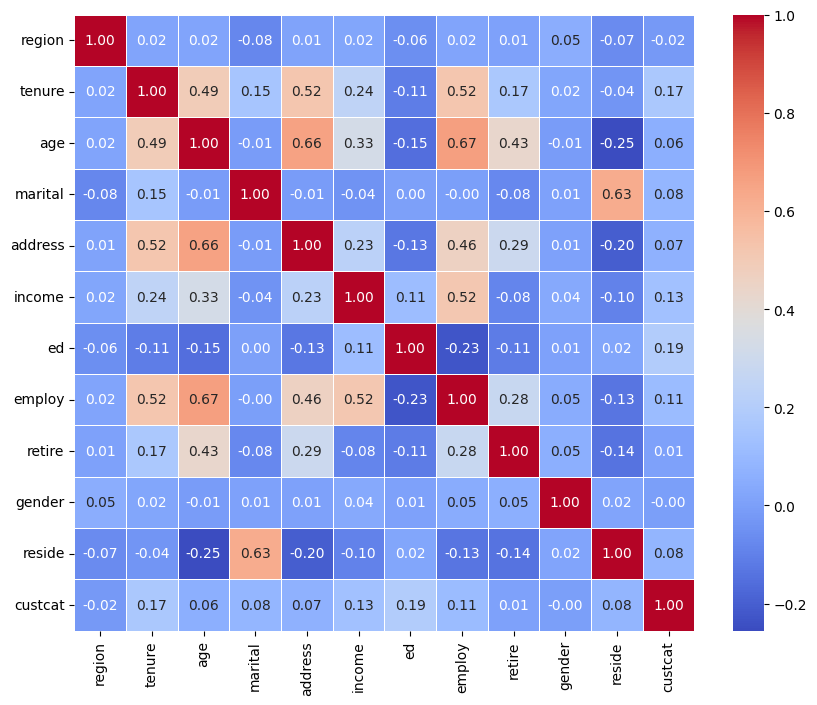

In [7]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values


Alcune variabili hanno una certa correlazione tra loro che spiega la loro dipendenza. Le variabili `retire` e `gender` sono poco correlate con `custcat` mentre `ed` e `tenure` hanno un effetto maggiore sul target.


## Preprocessing


In [8]:
X = df.drop('custcat', axis=1)
y = df['custcat']

X_norm = StandardScaler().fit_transform(X)

X_train, X_rest, y_train, y_rest = train_test_split(X_norm, y, test_size=0.25, random_state=4)
X_test, X_vali, y_test, y_vali = train_test_split(X_rest, y_rest, test_size=0.5, random_state=4)

print(f'Train size: {X_train.size}')
print(f'Vali size: {X_vali.size}')
print(f'Test size: {X_test.size}')

Train size: 8250
Vali size: 1375
Test size: 1375




La normalizzazione delle features è cruciale per l'algoritmo k-NN. Infatti, questo modello calcola per ogni punto la distanza che lo separa dai punti vicini, e la normalizzazione assicura che ogni feature contribuisce allo stesso modo al calcolo di questa distanza.


## Definizione del modello


In [9]:
k = 3  # numero dei primi vicini
knn_classifier = KNeighborsClassifier(n_neighbors=k)  # definzione
knn_model = knn_classifier.fit(X_train,y_train)  # addestramento
yhat = knn_model.predict(X_test)  # predizione
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.344


Il parametro k indica il numero di vicini per ciascun punto; è un iperparametro che deve essere monitorato.

k = 1 	 vali acc: 0.27 	 test acc: 0.32
k = 2 	 vali acc: 0.26 	 test acc: 0.34
k = 3 	 vali acc: 0.26 	 test acc: 0.34
k = 4 	 vali acc: 0.27 	 test acc: 0.39
k = 5 	 vali acc: 0.29 	 test acc: 0.39
k = 7 	 vali acc: 0.27 	 test acc: 0.44
k = 8 	 vali acc: 0.26 	 test acc: 0.40
k = 9 	 vali acc: 0.31 	 test acc: 0.40
k = 10 	 vali acc: 0.32 	 test acc: 0.37
k = 11 	 vali acc: 0.30 	 test acc: 0.38
k = 13 	 vali acc: 0.30 	 test acc: 0.38
k = 14 	 vali acc: 0.34 	 test acc: 0.38
k = 15 	 vali acc: 0.29 	 test acc: 0.38
k = 16 	 vali acc: 0.33 	 test acc: 0.38
k = 17 	 vali acc: 0.33 	 test acc: 0.38
k = 19 	 vali acc: 0.31 	 test acc: 0.34
k = 20 	 vali acc: 0.32 	 test acc: 0.35
k = 21 	 vali acc: 0.32 	 test acc: 0.36
k = 22 	 vali acc: 0.34 	 test acc: 0.33
k = 23 	 vali acc: 0.35 	 test acc: 0.35
k = 25 	 vali acc: 0.35 	 test acc: 0.36
k = 26 	 vali acc: 0.37 	 test acc: 0.36
k = 27 	 vali acc: 0.36 	 test acc: 0.34
k = 28 	 vali acc: 0.37 	 test acc: 0.33
k = 30 	 vali acc: 0.38 

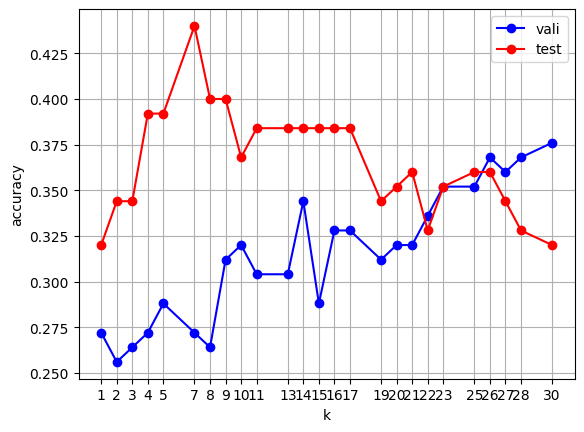

In [13]:
# Loop per testare le performance del modello su più valori di k
k_param = np.linspace(1, 30, 25).astype('int')
hist_vali_acc = []
hist_test_acc = []

for i, k in enumerate(k_param):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)  # definizione
  model = knn_classifier.fit(X_train, y_train)  # addestramento sul train set

  yhat_vali = model.predict(X_vali)  # predizione sul vali set
  vali_acc = accuracy_score(y_vali, yhat_vali)  # accuracy sul vali set
  hist_vali_acc.append(vali_acc)

  yhat_test = model.predict(X_test)  # predizione sul test set
  test_acc = accuracy_score(y_test, yhat_test)  # accuracy sul test set
  hist_test_acc.append(test_acc)

  print(f'k = {k} \t vali acc: {vali_acc:.2f} \t test acc: {test_acc:.2f}')

plt.plot(k_param, hist_vali_acc, label='vali', color='b', marker='o')
plt.plot(k_param, hist_test_acc, label='test', color='r', marker='o')
plt.legend()
plt.xticks(k_param)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()

# Valore migliore di k
max_test_acc = np.array(hist_test_acc).max()
best_index = np.where(hist_test_acc == max_test_acc)
k_best = k_param[best_index[0]]
print(f'\nMax test accuracy: {max_test_acc} for k = {k_best[0]}')

In questo caso il valore migliore è `k = 4`, ovvero il valore per il quale il modello generalizza meglio e ottiene le prestazioni migliori sul test set. Per valori maggiori di k il modello comincia a generalizzare male, finendo poi in una situazione di overfitting per valori ancora maggiori di k.

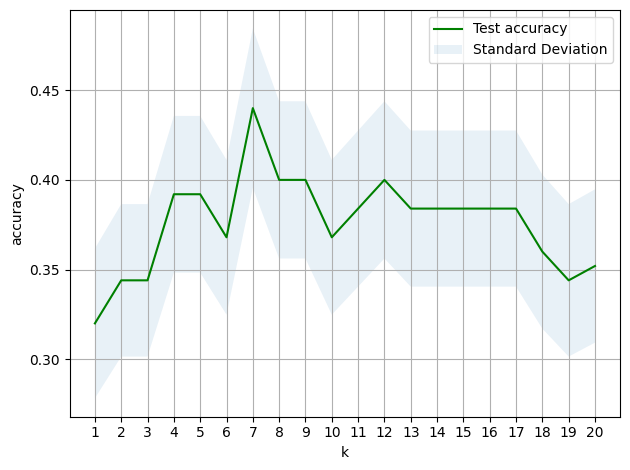


Max test accuracy: 0.44 with k = 7


In [22]:
# Altro modo per lo stesso test
Ks = 20
acc = np.zeros((Ks))
std_acc = np.zeros((Ks))
for n in range(1,Ks+1):
    # Train Model and Predict
    knn_model_n = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat = knn_model_n.predict(X_test)
    acc[n-1] = accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,Ks+1),acc,'g')
plt.fill_between(range(1,Ks+1),acc - 1 * std_acc,acc + 1 * std_acc, alpha=0.10)
plt.legend(('Test accuracy', 'Standard Deviation'))
plt.ylabel('accuracy')
plt.xlabel('k')
plt.xticks(range(1, Ks+1))
plt.tight_layout()
plt.grid()
plt.show()

print( "\nMax test accuracy:", acc.max(), "with k =", acc.argmax()+1)

## Selezione delle features più rilevanti



In [67]:
correlation_values = abs(df.corr()['custcat']).drop('custcat')
correlation_values = correlation_values.sort_values(ascending=False)[:9]  # prime sei features più rilevanti
correlation_values

,custcat
ed,0.193864
tenure,0.166691
income,0.134525
employ,0.110011
marital,0.083836
reside,0.082022
address,0.067913
age,0.056909
region,0.023771


In [68]:
topfeat = correlation_values.index
X = df[topfeat].values
# y resta invariato

X_norm = StandardScaler().fit_transform(X)

X_train, X_rest, y_train, y_rest = train_test_split(X_norm, y, test_size=0.20, random_state=4)
X_test, X_vali, y_test, y_vali = train_test_split(X_rest, y_rest, test_size=0.5, random_state=4)

print(f'Train size: {X_train.size}')
print(f'Vali size: {X_vali.size}')
print(f'Test size: {X_test.size}')

Train size: 7200
Vali size: 900
Test size: 900


k = 1 	 vali acc: 0.35 	 test acc: 0.36
k = 2 	 vali acc: 0.34 	 test acc: 0.40
k = 3 	 vali acc: 0.33 	 test acc: 0.42
k = 4 	 vali acc: 0.39 	 test acc: 0.35
k = 5 	 vali acc: 0.37 	 test acc: 0.34
k = 7 	 vali acc: 0.36 	 test acc: 0.42
k = 8 	 vali acc: 0.31 	 test acc: 0.37
k = 9 	 vali acc: 0.32 	 test acc: 0.36
k = 10 	 vali acc: 0.34 	 test acc: 0.36
k = 11 	 vali acc: 0.36 	 test acc: 0.38
k = 13 	 vali acc: 0.38 	 test acc: 0.39
k = 14 	 vali acc: 0.36 	 test acc: 0.38
k = 15 	 vali acc: 0.37 	 test acc: 0.34
k = 16 	 vali acc: 0.35 	 test acc: 0.35
k = 17 	 vali acc: 0.33 	 test acc: 0.34
k = 19 	 vali acc: 0.39 	 test acc: 0.36
k = 20 	 vali acc: 0.39 	 test acc: 0.36
k = 21 	 vali acc: 0.37 	 test acc: 0.36
k = 22 	 vali acc: 0.38 	 test acc: 0.34
k = 23 	 vali acc: 0.38 	 test acc: 0.35
k = 25 	 vali acc: 0.37 	 test acc: 0.38
k = 26 	 vali acc: 0.38 	 test acc: 0.36
k = 27 	 vali acc: 0.37 	 test acc: 0.36
k = 28 	 vali acc: 0.33 	 test acc: 0.37
k = 30 	 vali acc: 0.34 

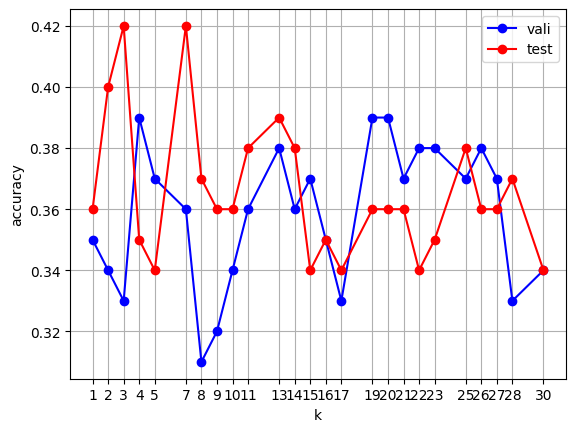

In [69]:
# Loop per testare le performance del modello su più valori di k
k_param = np.linspace(1, 30, 25).astype('int')
hist_vali_acc = []
hist_test_acc = []

for i, k in enumerate(k_param):
  knn_classifier = KNeighborsClassifier(n_neighbors=k)  # definizione
  model = knn_classifier.fit(X_train, y_train)  # addestramento sul train set

  yhat_vali = model.predict(X_vali)  # predizione sul vali set
  vali_acc = accuracy_score(y_vali, yhat_vali)  # accuracy sul vali set
  hist_vali_acc.append(vali_acc)

  yhat_test = model.predict(X_test)  # predizione sul test set
  test_acc = accuracy_score(y_test, yhat_test)  # accuracy sul test set
  hist_test_acc.append(test_acc)

  print(f'k = {k} \t vali acc: {vali_acc:.2f} \t test acc: {test_acc:.2f}')

plt.plot(k_param, hist_vali_acc, label='vali', color='b', marker='o')
plt.plot(k_param, hist_test_acc, label='test', color='r', marker='o')
plt.legend()
plt.xticks(k_param)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()

# Valore migliore di k
max_test_acc = np.array(hist_test_acc).max()
best_index = np.where(hist_test_acc == max_test_acc)
k_best = k_param[best_index[0]]
print(f'\nMax test accuracy: {max_test_acc} for k = {k_best[0]}')